In [5]:
import mplfinance as mpf
import pandas as pd  

In [17]:
csv_data_name = "audusd_240"
df = pd.read_csv(f'../csv_data/csv_{csv_data_name}.csv', parse_dates=True, index_col=[0])[:100]

C:\Users\mubin\AppData\Local\Programs\Python\Python311\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


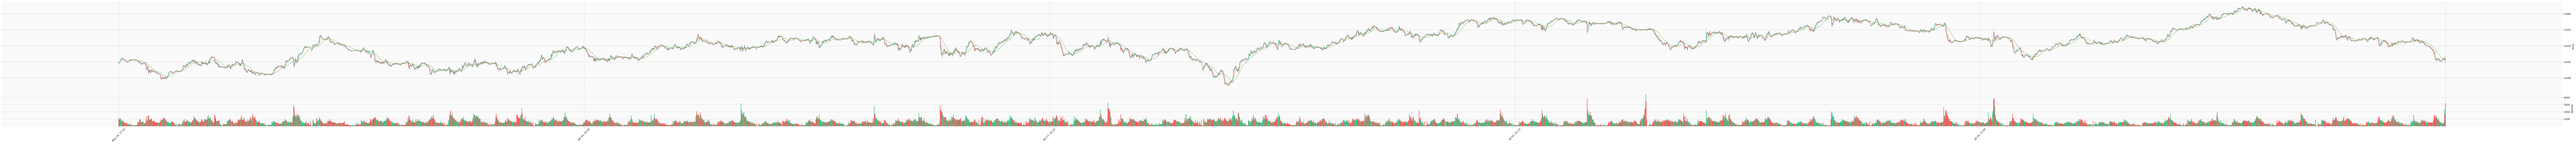

In [ ]:
# simple candle + 3/7/21 MA + volume
mpf.plot(df, type='candle', mav=(3,7,21), volume=True, style='yahoo', figsize=(200,10))

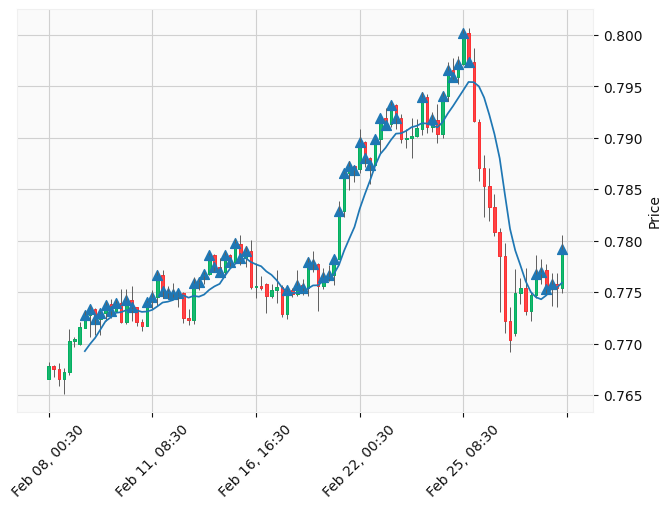

In [21]:
import numpy as np
ma8 = df['Close'].rolling(8).mean()
signal_points = np.where(df['Close'] > ma8, df['Close'], np.nan)  # show only points where condition true

ap1 = mpf.make_addplot(ma8, panel=0, width=1.25)        # line overlay on price panel
ap2 = mpf.make_addplot(signal_points, type='scatter', markersize=50, marker='^', panel=0)

mpf.plot(df, type='candle', addplot=[ap1, ap2], volume=False, style="yahoo")


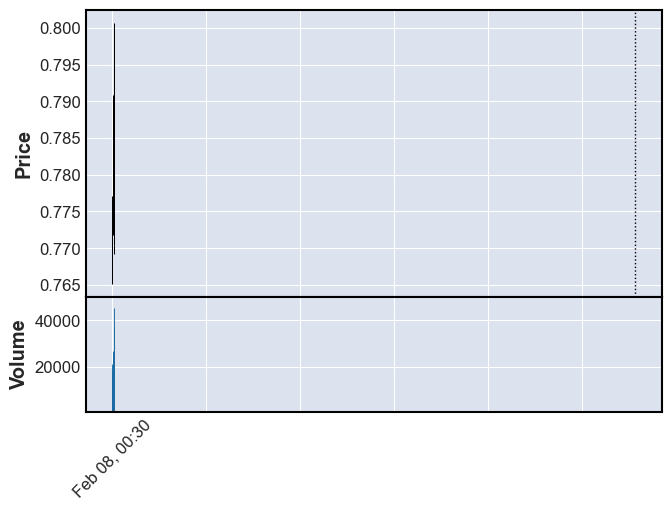

In [24]:
# Vertical lines and date-based markings
# There’s no single high-level vlines param you must use — prefer Matplotlib calls via returnfig=True:

fig, axes = mpf.plot(df, returnfig=True, type='candle', volume=True)
ax = axes[0]
ax.axvline(pd.Timestamp('2025-09-01'), color='k', linestyle=':', linewidth=1)


In [27]:
import mplfinance as mpf
import pandas as pd

# example: assume df is your OHLC DataFrame with DateTimeIndex
fig, axes = mpf.plot(
    df,
    type='candle',
    volume=True,
    returnfig=True,
    figsize=(12,6)
)

ax_price = axes[0]   # main price axis

# add horizontal line at price = 310
ax_price.axhline(310, color='red', linestyle='--', linewidth=1)

# add label on the line
ax_price.text(df.index[-1], 310, 'Resistance 310',
              va='center', ha='left', color='red')

mpf.show()   # <--- this is crucial
